In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the csv
data = pd.read_csv("traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
# Drop the 'ID' column
data.drop(columns=['ID'], inplace=True)

# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract 'Date', 'Time', and 'Day'
data['Date'] = data['DateTime'].dt.date
data['Time'] = data['DateTime'].dt.time
data['Day'] = data['DateTime'].dt.day_name()

# Drop the original 'DateTime' column
data.drop(columns=['DateTime'], inplace=True)

# Reorder columns
data = data[['Date', 'Time', 'Day', 'Junction', 'Vehicles']]

# Preview
data.head()

,Date,Time,Day,Junction,Vehicles
0,2015-11-01,00:00:00,Sunday,1,15
1,2015-11-01,01:00:00,Sunday,1,13
2,2015-11-01,02:00:00,Sunday,1,10
3,2015-11-01,03:00:00,Sunday,1,7
4,2015-11-01,04:00:00,Sunday,1,9


In [ ]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract Year, Month, and DayOfMonth
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfMonth'] = data['Date'].dt.day  # Avoid confusion with 'Day' which is the name of the day of the week
data.drop(columns=['Date'], inplace=True)

# Reorder columns
data = data[['Year', 'Month', 'DayOfMonth', 'Time', 'Day', 'Junction', 'Vehicles']]

# Preview
data.head()

,Year,Month,DayOfMonth,Time,Day,Junction,Vehicles
0,2015,11,1,00:00:00,Sunday,1,15
1,2015,11,1,01:00:00,Sunday,1,13
2,2015,11,1,02:00:00,Sunday,1,10
3,2015,11,1,03:00:00,Sunday,1,7
4,2015,11,1,04:00:00,Sunday,1,9


In [ ]:
data.describe()

,Year,Month,DayOfMonth,Junction,Vehicles
count,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000
mean,2016.269825,5.884289,15.700748,2.180549,22.791334
std,0.616093,3.569872,8.784073,0.966955,20.750063
min,2015.000000,1.000000,1.000000,1.000000,1.000000
25%,2016.000000,3.000000,8.000000,1.000000,9.000000
50%,2016.000000,5.000000,16.000000,2.000000,15.000000
75%,2017.000000,9.000000,23.000000,3.000000,29.000000
max,2017.000000,12.000000,31.000000,4.000000,180.000000


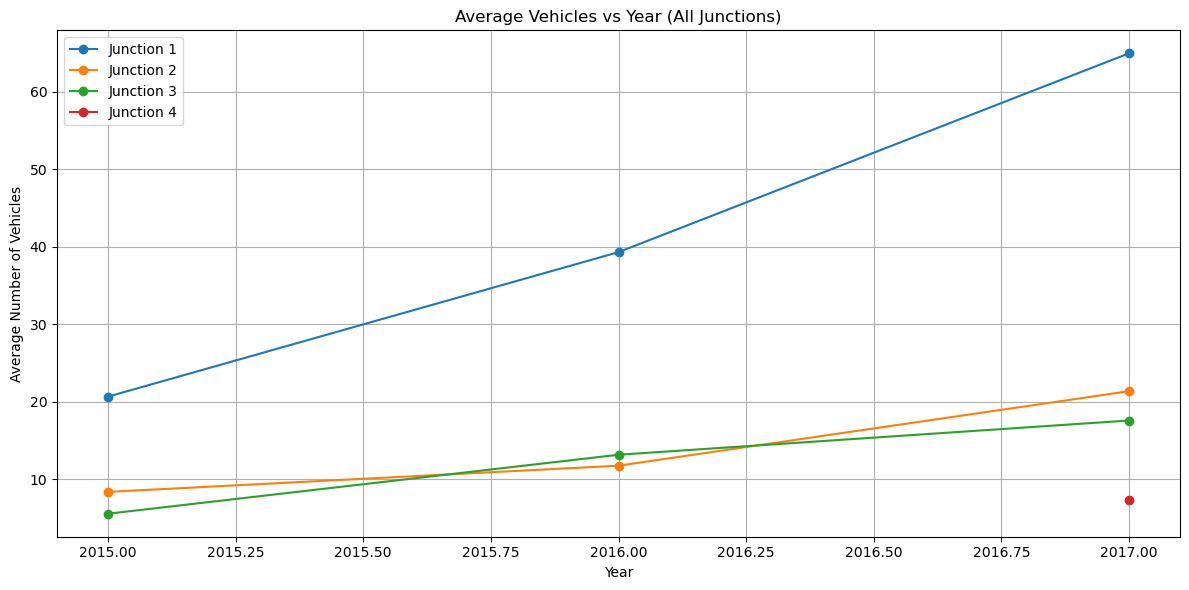

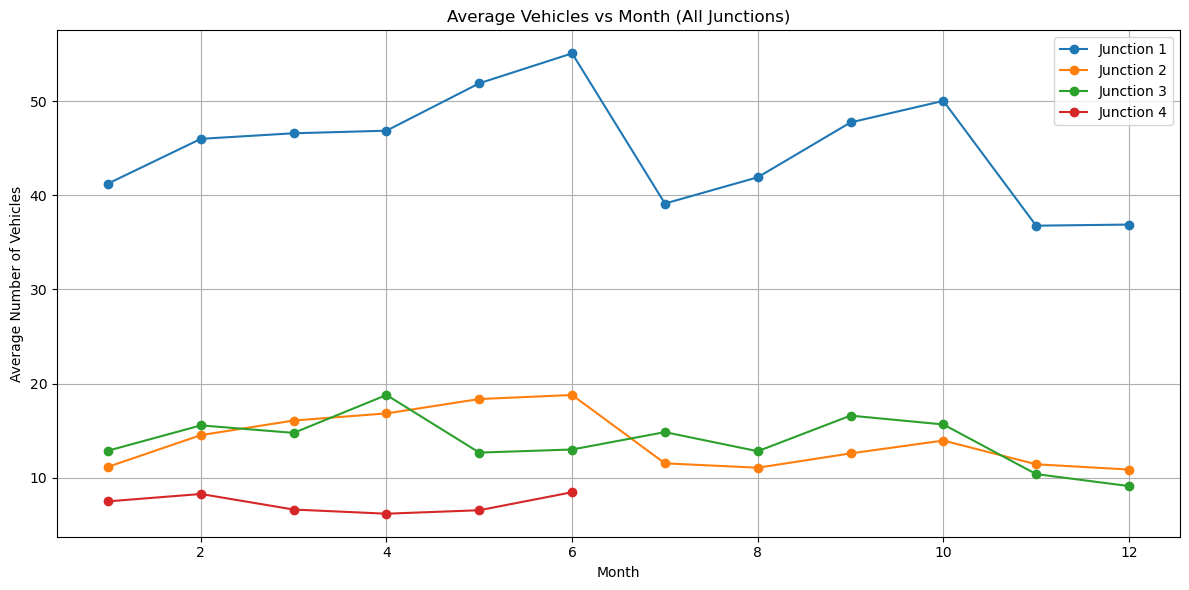

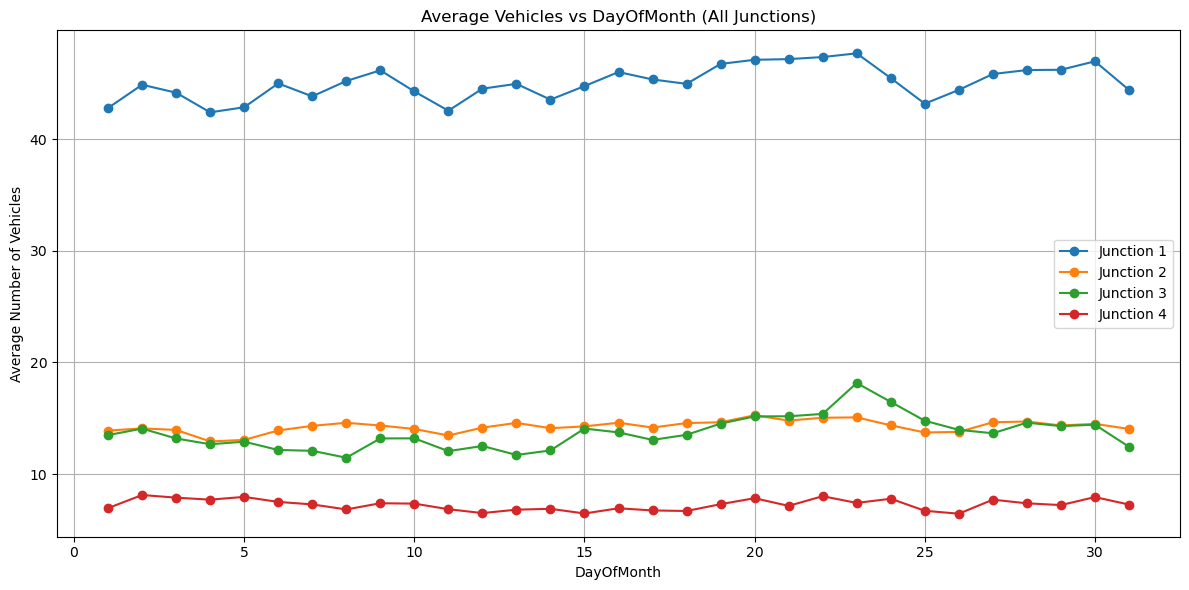

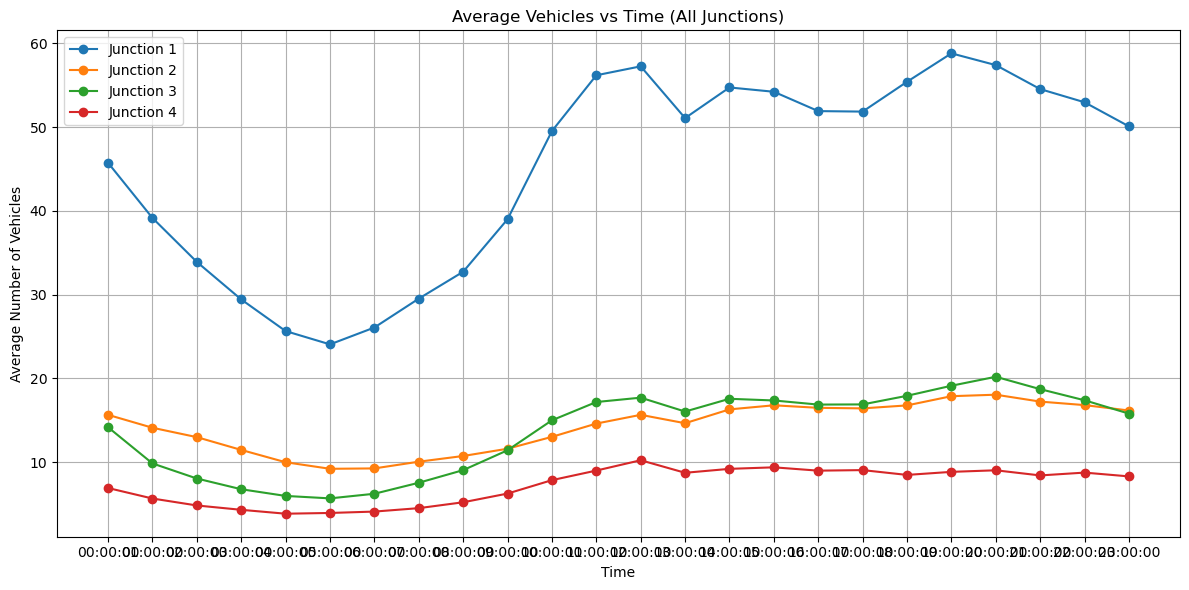

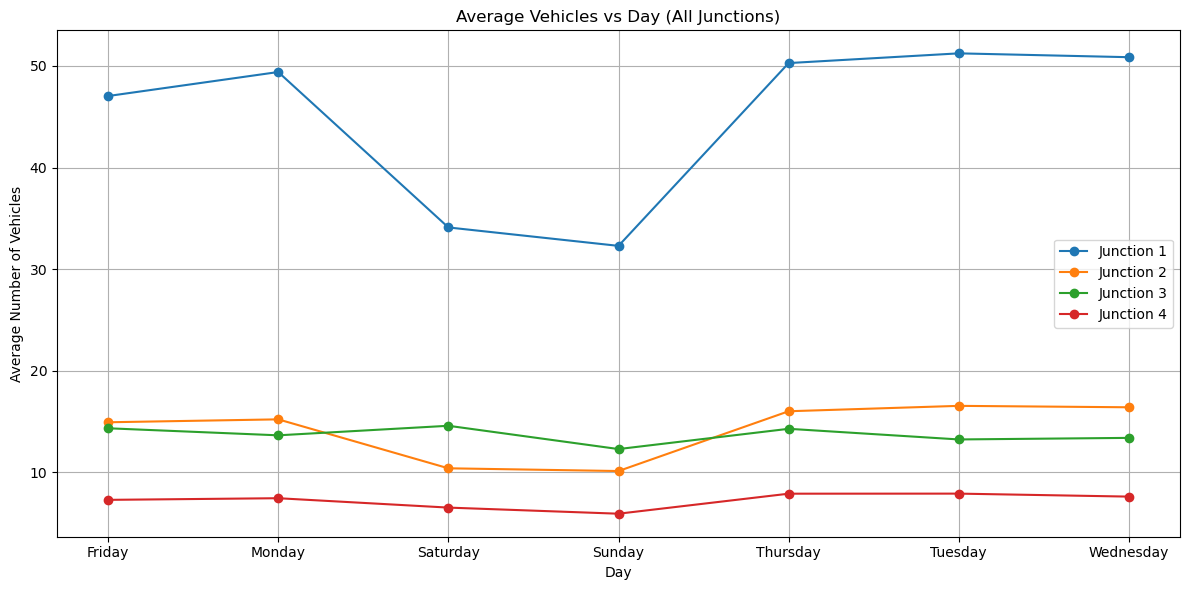

In [ ]:
# Make sure time is a string for sorting
data['Time'] = data['Time'].astype(str)

# Variables to plot
x_vars = ['Year', 'Month', 'DayOfMonth', 'Time', 'Day']
junctions = data['Junction'].unique()

for x in x_vars:
    plt.figure(figsize=(12, 6))

    for junction in junctions:
        df_junc = data[data['Junction'] == junction]

        # Group data
        if x in ['Time', 'Day']:
            grouped = df_junc.groupby(x)['Vehicles'].mean()
        else:
            grouped = df_junc.groupby(x)['Vehicles'].mean().sort_index()

        # Plot each junction's line on the same graph
        plt.plot(grouped.index, grouped.values, label=f'Junction {junction}', marker='o')

    # Add labels and legend
    plt.title(f'Average Vehicles vs {x} (All Junctions)')
    plt.xlabel(x)
    plt.ylabel('Average Number of Vehicles')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

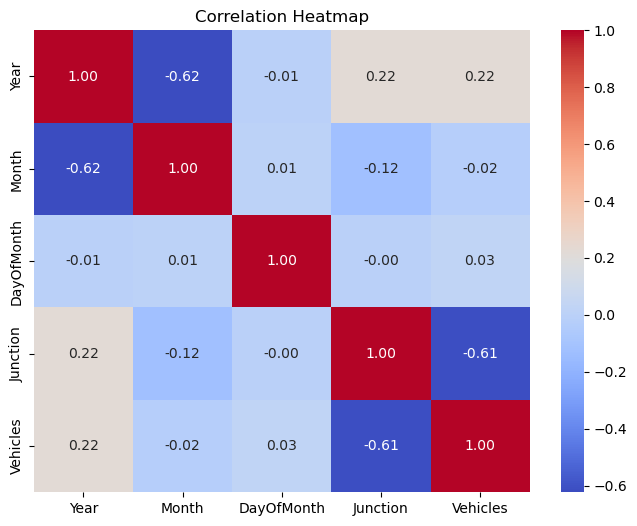

In [ ]:
# Compute correlation matrix (only numerical columns)
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

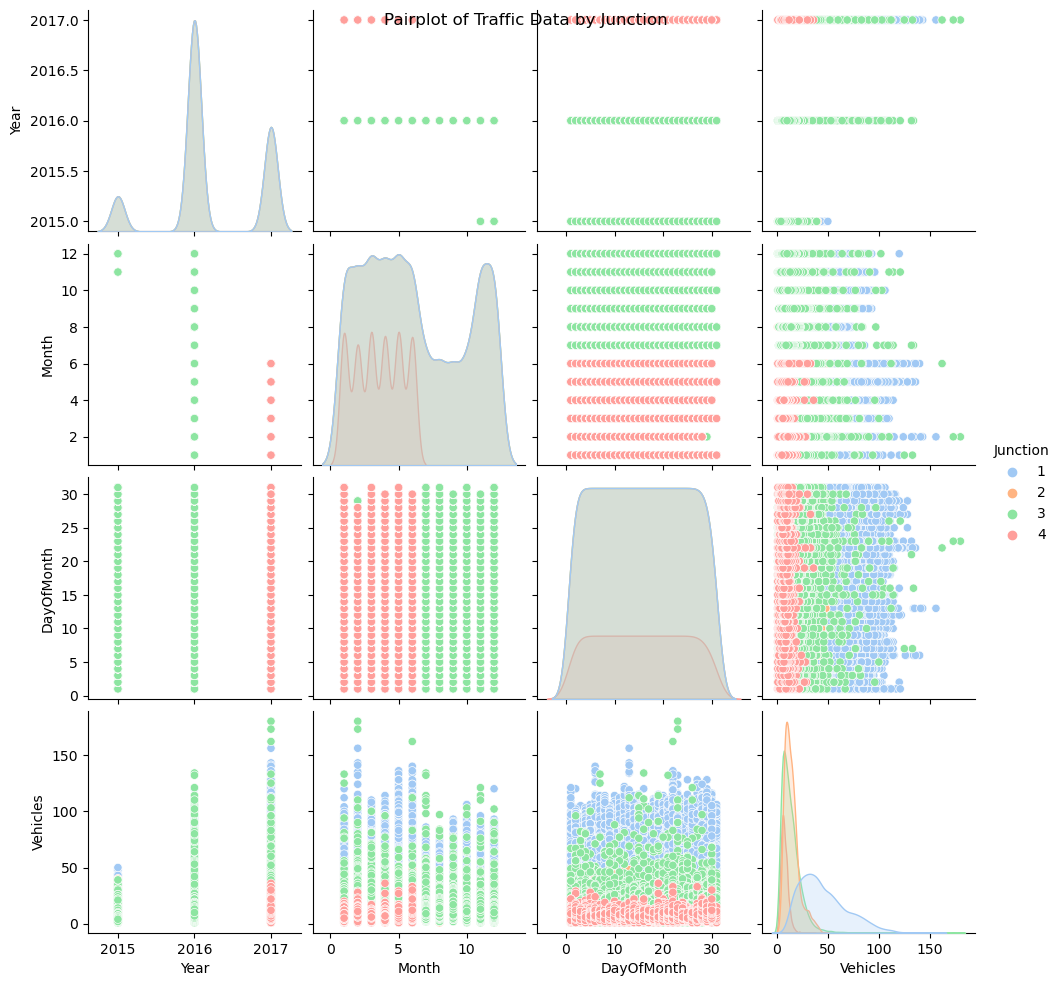

In [ ]:
# Create the pairplot with pastel palette
sns.pairplot(data, hue='Junction', palette='pastel')
plt.suptitle("Pairplot of Traffic Data by Junction")
plt.show()